# *Automate the Boring Stuff with Python*

Link with the book content and some other helpfull material :-)
https://automatetheboringstuff.com/2e/chapter11/

# The raise and assert Statements

In [1]:
#this is the output we want

"""
*************
*           *
*           *
*           *
*************

"""

#function to print the output above, the symbol we can define anyone char or num
def boxPrint(symbol, width, height):
    print(symbol * width)
    
    for i in range(height - 2):
        print(symbol + (' '* (width - 2)) + symbol)
        
    print(symbol * width)
    
boxPrint('*',15, 5)

boxPrint('o',15, 5)
        

***************
*             *
*             *
*             *
***************
ooooooooooooooo
o             o
o             o
o             o
ooooooooooooooo


In [2]:
# the output above is correct but if we use two symbols there is no error but
#it is the wrong output
boxPrint('**',15, 5)

******************************
**             **
**             **
**             **
******************************


In [3]:
#to detect the situations where the output is not what we want
def boxPrint(symbol, width, height):
    if len(symbol) != 1: #make sure the symbol have the right length
        raise Exception('"symbol" need to be a string o lenght one')
    if(width < 2) or (height < 2):
        raise Exception('"width" and "height" must be greater or equal to 2.')
        
    print(symbol * width)
    
    for i in range(height - 2):
        print(symbol + (' '* (width - 2)) + symbol)
        
    print(symbol * width)

In [4]:
boxPrint('*',1, 1)

Exception: "width" and "height" must be greater or equal to 2.

In [5]:
boxPrint('**',15, 4)

Exception: "symbol" need to be a string o lenght one

In [6]:
# save the errors in a log in the current working directory

import traceback
try:
    raise Exception('This is the error message.')
except:
    errorFile = open('error_log.txt', 'a') #in append mode
    errorFile.write(traceback.format_exc())
    errorFile.close()
    print('The traceback info was writeen error_log.txt')

The traceback info was writeen error_log.txt


In [7]:
# another way of control if the assertion condition is False it
# raises an error and the execution of the program stops
assert False, 'This is the error message.'

AssertionError: This is the error message.

In [8]:
market_2nd = {'ns': 'green', 'ew': 'red'}

In [9]:
def switchLights(stoplight):
    for key in stoplight.keys():
        if stoplight[key] == 'green':
            stoplight[key] = 'yellow'
        elif stoplight[key] == 'yellow':
            stoplight[key] = 'red'
        elif stoplight[key] == 'red':
            stoplight[key] = 'green'
    assert 'red' in stoplight.values(), 'Neither light is red! ' + str(stoplight)

switchLights(market_2nd)

AssertionError: Neither light is red! {'ns': 'yellow', 'ew': 'green'}

In [10]:
print(market_2nd)

{'ns': 'yellow', 'ew': 'green'}


You can raise your own exceptions: raise Exception(‘This is the error message.')
You can also use assertions: assert condition, ‘Error message'
Assertions are for detecting programmer errors that are not meant to be recovered from. User errors should raise exceptions.

# Logging

In [11]:
import logging
logging.basicConfig(level=logging.DEBUG, format=' %(asctime)s -  %(levelname)s -  %(message)s')

In [12]:
logging.debug('Start of program')

def factorial(n):
    logging.debug('Start of factorial(%s)' % (n))
    total = 1
    for i in range(n+1):
        total *= i
        logging.debug('i is %s, total is %s' % (i, total))
        
    logging.debug('Return value is %s' % (total))
    return total
print(factorial(5))

logging.debug('End of program')
    

 2021-09-16 12:41:02,240 -  DEBUG -  Start of program
 2021-09-16 12:41:02,241 -  DEBUG -  Start of factorial(5)
 2021-09-16 12:41:02,242 -  DEBUG -  i is 0, total is 0
 2021-09-16 12:41:02,242 -  DEBUG -  i is 1, total is 0
 2021-09-16 12:41:02,243 -  DEBUG -  i is 2, total is 0
 2021-09-16 12:41:02,243 -  DEBUG -  i is 3, total is 0
 2021-09-16 12:41:02,244 -  DEBUG -  i is 4, total is 0
 2021-09-16 12:41:02,244 -  DEBUG -  i is 5, total is 0
 2021-09-16 12:41:02,244 -  DEBUG -  Return value is 0
 2021-09-16 12:41:02,245 -  DEBUG -  End of program


0


In [13]:
# the proble is in this line :
# for i in range(n+1):  because the range starts in zero we are multiplying by zero


logging.disable(logging.CRITICAL)#disables all the messages at he higher level and lower level that is the critical

logging.debug('Start of program')

def factorial(n):
    logging.debug('Start of factorial(%s)' % (n))
    total = 1
    for i in range(1,n+1): #now is corrected
        total *= i
        logging.debug('i is %s, total is %s' % (i, total))
        
    logging.debug('Return value is %s' % (total))
    return total
print(factorial(5))

logging.debug('End of program')

120


In [14]:
#to write the error log to a file change the first line and put the paramater filename = 'name of log file.txt'
logging.basicConfig(level=logging.DEBUG, format=' %(asctime)s -  %(levelname)s -  %(message)s',filename='logs.txt',force = True)

"""The code above creates a file put it doesn't write in it if we run a python script with this code with will create and write without using the force = True
Logging to a File.py"""

#logging.disable(logging.CRITICAL)#disables all the messages at he higher level and lower level that is the critical

logging.debug('Start of program')

def factorial(n):
    logging.debug('Start of factorial(%s)' % (n))
    total = 1
    for i in range(1,n+1): #now is corrected
        total *= i
        logging.debug('i is %s, total is %s' % (i, total))
        
    logging.debug('Return value is %s' % (total))
    return total
print(factorial(5))

logging.debug('End of program')

120


The logging module lets you display logging messages.
Log messages create a "breadcrumb trail" of what your program is doing.
After calling logging.basicConfig() to set up logging, call logging.debug(‘This is the message') to create a log message.
When done, you can disable the log messages with logging.disable(logging.CRITICAL)
Don't use print() for log messages: It's hard to remove the mall when you're done debugging.
The five log levels are: DEBUG, INFO, WARNING, ERROR, and CRITICAL.
You can also log to a file instead of the screen with the filename keyword argument in the logging.basicConfig() function.

# Using the Debugger

The debugger is a feature of Python IDLE Shell(**Figure 1**) or the Mu editor, IDLE, and other editor software that allows you to execute your program one line at a time. The debugger will run a single line of code and then wait for you to tell it to continue. By running your program “under the debugger” like this, you can take as much time as you want to examine the values in the variables at any given point during the program’s lifetime. This is a valuable tool for tracking down bugs.

To run a program under Mu’s debugger, click the Debug button in the top row of buttons, next to the Run button. Along with the usual output pane at the bottom, the Debug Inspector pane will open along the right side of the window. This pane lists the current value of variables in your program. In **Figure 2**, the debugger has paused the execution of the program just before it would have run the first line of code. You can see this line highlighted in the file editor.

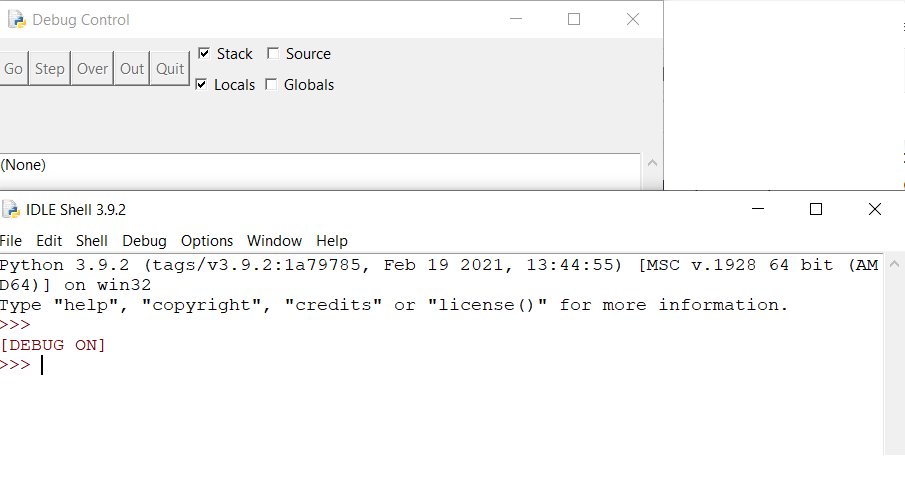
<h1><font size="2"><center>Figure 1:   Python IDLE Shell</center><font></h1>

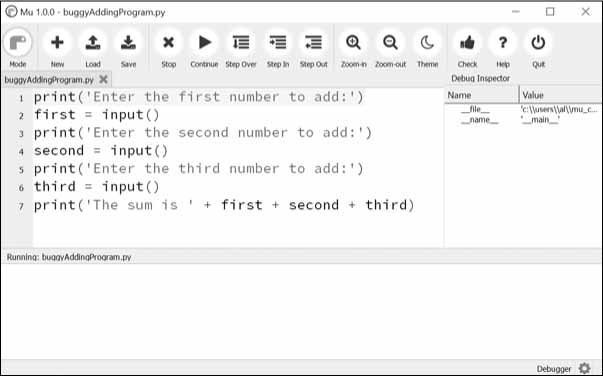
<h1><font size="2"><center>Figure 2:  Mu running a program under the debugger</center><font></h1>

Debugging mode also adds the following new buttons to the top of the editor: **Continue, Step Over, Step In, and Step Out**. The usual Stop button is also available.

## Continue

Clicking the Continue button will cause the program to execute normally until it terminates or reaches a breakpoint. (I will describe breakpoints later in this chapter.) If you are done debugging and want the program to continue normally, click the Continue button.

## Step In

Clicking the Step In button will cause the debugger to execute the next line of code and then pause again. If the next line of code is a function call, the debugger will “step into” that function and jump to the first line of code of that function.

## Step Over

Clicking the Step Over button will execute the next line of code, similar to the Step In button. However, if the next line of code is a function call, the Step Over button will “step over” the code in the function. The function’s code will be executed at full speed, and the debugger will pause as soon as the function call returns. For example, if the next line of code calls a spam() function but you don’t really care about code inside this function, you can click Step Over to execute the code in the function at normal speed, and then pause when the function returns. For this reason, using the Over button is more common than using the Step In button.

## Step Out

Clicking the Step Out button will cause the debugger to execute lines of code at full speed until it returns from the current function. If you have stepped into a function call with the Step In button and now simply want to keep executing instructions until you get back out, click the Out button to “step out” of the current function call.

## Stop

If you want to stop debugging entirely and not bother to continue executing the rest of the program, click the Stop button. The Stop button will immediately terminate the program.

The debugger is a tool that lets you execute Python code one instruction at a time and shows you the values in variables.
Open the Debug Control window with Debug > Debugger before running the program.
The Over button will step over the current line of code and pause on the next one.
The Step button will step into a function call.
The Out button will step out of the current function you are in.
The Go button will continue the program until the next breakpoint or until the end of the program if there are no breakpoints.
The Quit button will immediately terminate the program.
Breakpoints are lines where the debugger will pause and let you choose when to continue running the program.
Breakpoints can be set by right-clicking the file editor window and selecting "Set Breakpoint"

# Practice Questions
1. Write an assert statement that triggers an AssertionError if the variable spam is an integer less than 10.

2. Write an assert statement that triggers an AssertionError if the variables eggs and bacon contain strings that are the same as each other, even if their cases are different (that is, 'hello' and 'hello' are considered the same, and 'goodbye' and 'GOODbye' are also considered the same).

3. Write an assert statement that always triggers an AssertionError.

4. What are the two lines that your program must have in order to be able to call logging.debug()?

5. What are the two lines that your program must have in order to have logging.debug() send a logging message to a file named programLog.txt?

6. What are the five logging levels?

7. What line of code can you add to disable all logging messages in your program?

8. Why is using logging messages better than using print() to display the same message?

9. What are the differences between the Step Over, Step In, and Step Out buttons in the debugger?

10. After you click Continue, when will the debugger stop?

11. What is a breakpoint?

12. How do you set a breakpoint on a line of code in Mu?

In [15]:
#1. Write an assert statement that triggers an AssertionError if the variable spam is an integer less than 10.

def int_input(spam):
    if spam < 10:
        print(spam)
    assert spam >10 ,"spam should be an integer higher then 10"

int_input(5)

5


AssertionError: spam should be an integer higher then 10

In [16]:
#2. Write an assert statement that triggers an AssertionError if the variables eggs and bacon contain strings that
#are the same as each other, even if their cases are 
#different (that is, 'hello' and 'hello' are considered the same, and 'goodbye' and 'GOODbye' are also considered the same).

def breakfast(eggs,bacon):
    if eggs != bacon:
        print('Balanced breakfast')
    else:
        print('More of the same')
    assert (eggs.lower()) != (bacon.lower()) , 'the variables eggs and bacon should be different strings'

breakfast('eggs','Eggs')


Balanced breakfast


AssertionError: the variables eggs and bacon should be different strings

In [17]:
#3. Write an assert statement that always triggers an AssertionError.
assert False, 'statement that always triggers an AssertionError'

AssertionError: statement that always triggers an AssertionError

In [18]:
#4. What are the two lines that your program must have in order to be able to call logging.debug()?
import logging
logging.basicConfig(level = logging.DEBUG,format = "%(asctime)s - %(levelname)s - %(message)s")

In [19]:
#5. What are the two lines that your program must have in order to have logging.debug()
#send a logging message to a file named programLog.txt?
import logging
logging.basicConfig(filename = 'programLog.txt', level = logging.DEBUG, format = "%(asctime)s - %(levelname)s - %(message)s")

In [20]:
#6. What are the five logging levels?
DEBUG, INFO ,WARNING, ERROR, CRITICAL

NameError: name 'DEBUG' is not defined

In [21]:
#7. What line of code can you add to disable all logging messages in your program?
logging.disable(logging.CRITICAL)

In [22]:
#8. Why is using logging messages better than using print() to display the same message?

#I can use one line of code to disable all the logging messages, and it can be done by levels, chosing only the levels that i want to apear 
#on the screen

In [23]:
#9. What are the differences between the Step Over, Step In, and Step Out buttons in the debugger?

#The Step In button will move the debugger into a function call. The Step Over button will quickly execute the function call
#without stepping into it. The Step Out button will quickly execute the rest of the code until it steps out of the function
#it currently is in.

In [24]:
#10. After you click Continue, when will the debugger stop?

#when the program terminates or reaches a breakpoint

In [25]:
#11. What is a breakpoint?

#A breakpoint is a point set on a specific line of code that  forces the debugger to pause 
#whenever the program execution reaches that line

In [26]:
#12. How do you set a breakpoint on a line of code in Mu?

#To set a breakpoint, click the line number in the file editor to cause a red dot to appear, 
#marking the breakpoint like in Figure 3.

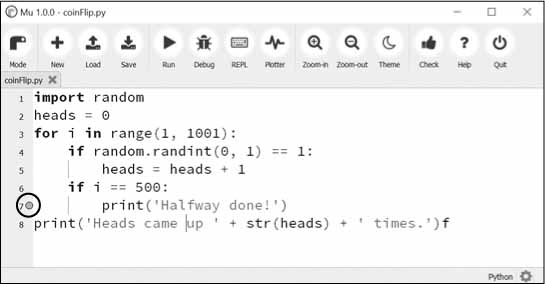
<h1><font size="2"><center>Figure 3:  red dot marking the breakpoint  </center><font></h1>

# Practice Project
For practice, write a program that does the following.

Debugging Coin Toss
The following program is meant to be a simple coin toss guessing game. The player gets two guesses (it’s an easy game). However, the program has several bugs in it. Run through the program a few times to find the bugs that keep the program from working correctly.

In [27]:
import random
guess = ''
while guess not in ('heads', 'tails'):
    print('Guess the coin toss! Enter heads or tails:')
    guess = input()
toss = random.randint(0, 1) # 0 is tails, 1 is heads
if toss == guess:
    print('You got it!')
else:
    print('Nope! Guess again!')
    guesss = input()
    if toss == guess:
        print('You got it!')
    else:
        print('Nope. You are really bad at this game.')

Guess the coin toss! Enter heads or tails:
head
Guess the coin toss! Enter heads or tails:
heads
Nope! Guess again!
heads
Nope. You are really bad at this game.


### Debugging of the practice project

In [ ]:
# the program should give a message if the input is not the right one e.g Heads or Tails
# we are comparing a string (heads or tails) with an integer that was a main problem for the program to not work!!!

In [33]:
import random

guess = ''
while guess not in ('heads', 'tails'):
    print('Guess the coin toss! Enter heads or tails:')
    guess = input()
toss = random.randint(0, 1) # 0 is tails, 1 is heads

#(under)code that i had to input for the program to work
if guess == 'heads':
    guess = 1
elif guess == 'tails':
    guess = 0
#(above)code that i had to input for the program to work

if toss == guess:
    print('You got it!')
else:
    print('Nope! Guess again!')
    guesss = input()
    if toss == guess:
        print('You got it!')
    else:
        print('Nope. You are really bad at this game.')

Guess the coin toss! Enter heads or tails:
heads
You got it!
